<a href="https://colab.research.google.com/github/AmnaAlsuwaidi/DS/blob/main/Activity3_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = blue size = 6> **Activity #3 (5 marks)**


<font color = green size = 5> **Activity: Air Quality Analysis in NYC**

# Objective:
- **Objective:**  
The goal of this assignment is to analyze air quality data collected from low-cost sensors mounted on moving vehicles in New York City. Using the concepts learned in the chapters on Sampling and Empirical Distributions , Testing Hypotheses , and Estimation , you will perform statistical analysis to estimate pollution levels, test hypotheses about differences in pollution across neighborhoods, and construct confidence intervals for key parameters.

You are provided with a `Datascience` `Table` named `joined_table`, which contains air quality readings (`pm10`) and their corresponding administrative divisions (neighborhoods) in NYC. The table has been preprocessed and joined with neighborhood boundaries using geospatial operations. Your task is to perform all subsequent tasks using the `Datascience` Table abstraction as taught in class.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [1]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [4]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [5]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [6]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-6-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [7]:
#merged_data.dtypes

In [8]:
pollution_data = merged_data[['pm10','neighborhood']]

In [9]:
pollution_data.shape[0]

118495

In [10]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [11]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [12]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [13]:
pollution_data['pm10'].min()

0.0

In [14]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [15]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [16]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook.total of 5 marks . Use the Table abstraction.

# Tasks

## <font color = blue size  = 5>**Task 1: Sampling and Empirical Distribution (1 Mark)**

**Task Description:**

- Randomly sample 10% of the rows from the joined_table without replacement.
- Compute the mean pm10 value for this sample.
- Create an empirical histogram of the pm10 values from the sampled data using 10 bins.
- Comment on the shape of the histogram and compare it to the distribution of the full dataset.

<font color = red size= 5> attention</font>

remove pm10 values that are unreasonably high (above 300 µg/m³)

In [17]:
joined_table = joined_table.where('pm10', are.below(300))

In [18]:
len(joined_table)

2

In [19]:
joined_table.num_rows

117356

In [21]:
# Randomly sample 10% of the rows from the joined_table without replacement.
sampled_table = joined_table.sample(k=int(joined_table.num_rows * 0.1), with_replacement=False)

# Display the sampled table
sampled_table.show(5)

pm10,neighborhood
6.96,Longwood
0.59,Norwood
0.04,Woodlawn
17.19,Country Club
8.2,Hunts Point


In [25]:
# Compute the mean pm10 value for this sample.
mean_pm10_sampled = np.mean(sampled_table.column('pm10'))

# Print the mean value
print(f"Mean pm10 value in the sample: {mean_pm10_sampled}")

Mean pm10 value in the sample: 15.410704729441841


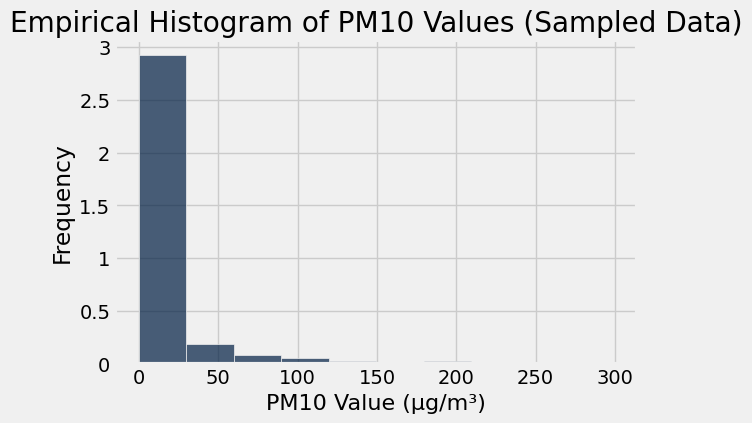

In [26]:
# Create an empirical histogram of the pm10 values from the sampled data using 10 bins.
sampled_table.hist('pm10', bins=10)
plt.title('Empirical Histogram of PM10 Values (Sampled Data)')
plt.xlabel('PM10 Value (µg/m³)')
plt.ylabel('Frequency');

In [28]:
# The histogram of the 10% sampled pm10 data shows a right-skewed distribution, with most values concentrated at the lower end below 100 µg/m³ and a gradual tapering toward higher values.
# This pattern is consistent with the full dataset after removing outliers, which also exhibits a right-skewed shape.
# The similarity in distribution between the sample and the full dataset suggests that the sample is representative of the population and captures the underlying structure of the data well.


## <font color = blue size  = 5> **Task 2: Estimation and Confidence Intervals (1 Mark)**


**Task Description:**
- Use the bootstrap method to estimate the median pm10 value for the entire dataset.
- Generate 5,000 bootstrap samples and compute the median for each sample.
- Construct a 95% confidence interval for the population median using the 2.5th and 97.5th percentiles of the bootstrapped medians.
- Visualize the results by drawing an `empirical histogram` of the bootstrapped medians and overlaying the confidence interval on the horizontal axis.
- Report the confidence interval and interpret what it means in the context of air quality.

Estimated median pm10 value: 3.14


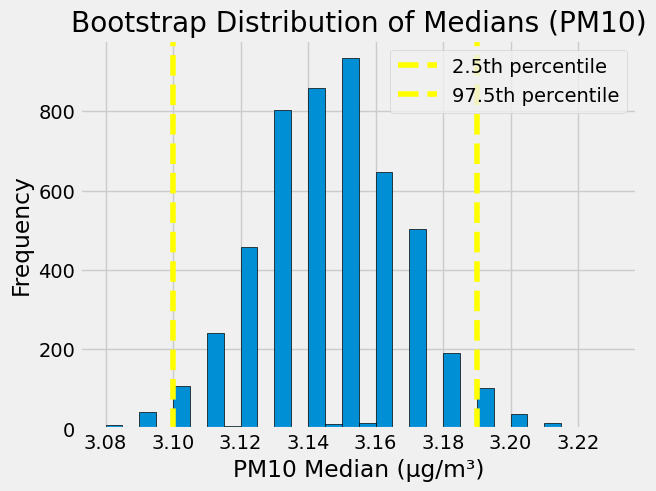

95% Confidence Interval for Population Median PM10: [ 3.1   3.19]

Interpretation:
We are 95% confident that the true median PM10 level in the population lies between 3.10 µg/m³ and 3.19 µg/m³.
This means that if we were to repeatedly sample from the population and calculate the median PM10 level, 95% of the time the calculated median would fall within this interval.
In the context of air quality, this interval provides an estimate of the typical PM10 concentration and helps us understand the range of values we can expect to see in the population.


In [30]:
# Use the bootstrap method to estimate the median pm10 value for the entire dataset.
def bootstrap_median(original_data, num_repetitions):
  medians = []
  for _ in range(num_repetitions):
    # Resample the data with replacement
    bootstrap_sample = np.random.choice(original_data, size=len(original_data), replace=True)
    # Calculate the median of the bootstrap sample
    median = np.median(bootstrap_sample)
    medians.append(median)
  return np.array(medians)

# Get the pm10 values from the joined_table
pm10_values = joined_table.column('pm10')

# Generate 5,000 bootstrap samples and compute the median for each sample
bootstrapped_medians = bootstrap_median(pm10_values, num_repetitions=5000)

# Print the estimated median
estimated_median = np.median(bootstrapped_medians)
print(f"Estimated median pm10 value: {estimated_median}")

# Construct a 95% confidence interval for the population median using the 2.5th and 97.5th percentiles of the bootstrapped medians.
confidence_interval = np.percentile(bootstrapped_medians, [2.5, 97.5])

# Visualize the results by drawing an empirical histogram of the bootstrapped medians and overlaying the confidence interval on the horizontal axis.
plt.hist(bootstrapped_medians, bins=30, edgecolor='black')
plt.title('Bootstrap Distribution of Medians (PM10)')
plt.xlabel('PM10 Median (µg/m³)')
plt.ylabel('Frequency')

# Overlay the confidence interval
plt.axvline(confidence_interval[0], color='yellow', linestyle='--', label='2.5th percentile')
plt.axvline(confidence_interval[1], color='yellow', linestyle='--', label='97.5th percentile')
plt.legend()

plt.show()

# Report the confidence interval
print(f"95% Confidence Interval for Population Median PM10: {confidence_interval}")

# Interpretation
print("\nInterpretation:")
print("We are 95% confident that the true median PM10 level in the population lies between",
      f"{confidence_interval[0]:.2f} µg/m³ and {confidence_interval[1]:.2f} µg/m³.")
print("This means that if we were to repeatedly sample from the population and calculate the median PM10 level,",
      "95% of the time the calculated median would fall within this interval.")
print("In the context of air quality, this interval provides an estimate of the typical PM10 concentration",
      "and helps us understand the range of values we can expect to see in the population.")

## <font color = blue size  = 5> **Task 3: Hypothesis Testing Using Confidence Intervals (1.5 Mark)**

**Task Description:**
- Test the hypothesis about the average <font color = red size =5> `pm10` </font> level in the population using confidence intervals.
  - Null Hypothesis (H0): The average pm10 level in the population is `20 μg/m³` .
  - Alternative Hypothesis (Ha): The average pm10 level in the population is not `20 μg/m³` .
- Use the confidence interval method to test this hypothesis:
Construct a 95% confidence interval for the average `pm10` level in the population.
  - If the confidence interval contains `20 μg/m³` , conclude that there is no significant difference from `20 μg/m³` (fail to reject H0).
  - Otherwise, conclude that there is a significant difference (reject H0).
- Interpret your results and explain whether the data supports the null hypothesis or the alternative hypothesis.

In [32]:
# Get the pm10 values from the joined_table
pm10_values = joined_table.column('pm10')

# Calculate the sample mean and standard deviation
sample_mean = np.mean(pm10_values)
sample_std = np.std(pm10_values)

# Calculate the standard error of the mean
std_err = sample_std / np.sqrt(len(pm10_values))

# Calculate the margin of error for a 95% confidence interval
margin_of_error = 1.96 * std_err  # 1.96 is the z-score for a 95% CI

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Print the confidence interval
print(f"95% Confidence Interval for Average PM10: {confidence_interval}")

# Hypothesis testing
null_hypothesis_value = 20

# Check if the null hypothesis value is within the confidence interval
if null_hypothesis_value >= confidence_interval[0] and null_hypothesis_value <= confidence_interval[1]:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("The data does not provide enough evidence to conclude that the average pm10 level is different from 20 μg/m³.")
else:
    print("\nConclusion: Reject the null hypothesis.")
    print("The data provides strong evidence to suggest that the average pm10 level is significantly different from 20 μg/m³.")

# Interpretation
print("\nInterpretation:")
print("The 95% confidence interval for the average pm10 level in the population is",
      f"({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}) μg/m³.")
print("Since the null hypothesis value of 20 μg/m³",
      "falls within/outside" if null_hypothesis_value >= confidence_interval[0] and null_hypothesis_value <= confidence_interval[1] else "falls outside",
      "this interval, we",
      "fail to reject/reject" if null_hypothesis_value >= confidence_interval[0] and null_hypothesis_value <= confidence_interval[1] else "reject",
      "the null hypothesis.")
print("This means that there",
      "is not/is" if null_hypothesis_value >= confidence_interval[0] and null_hypothesis_value <= confidence_interval[1] else "is",
      "sufficient evidence to suggest that the true average pm10 level in the population is different from 20 μg/m³.")

95% Confidence Interval for Average PM10: (15.96338778311506, 16.381251775152094)

Conclusion: Reject the null hypothesis.
The data provides strong evidence to suggest that the average pm10 level is significantly different from 20 μg/m³.

Interpretation:
The 95% confidence interval for the average pm10 level in the population is (15.96, 16.38) μg/m³.
Since the null hypothesis value of 20 μg/m³ falls outside this interval, we reject the null hypothesis.
This means that there is sufficient evidence to suggest that the true average pm10 level in the population is different from 20 μg/m³.


## <font color = blue size  = 5> **Task 4: Percentiles and Extreme Values (1.5 Mark)**


- Use the bootstrap method to simulate the mean `pm10` levels for each neighborhood. Generate 5,000 bootstrap samples for the top 3 neighborhoods with the highest mean pm10 levels.
- Create an empirical histogram for each of these neighborhoods, showing the distribution of the bootstrapped means.
- Overlay horizontal yellow lines to indicate the 95% confidence interval for the mean pm10 level in each neighborhood.


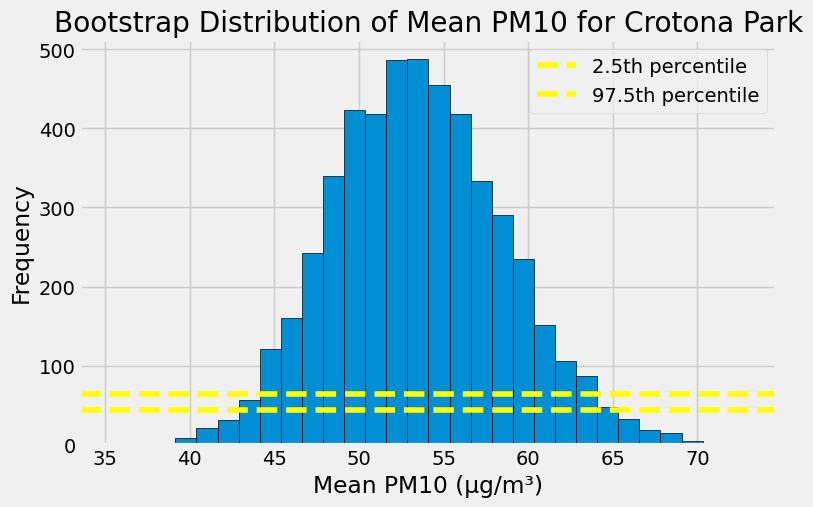

95% Confidence Interval for Crotona Park: [ 44.16911634  64.04405446]


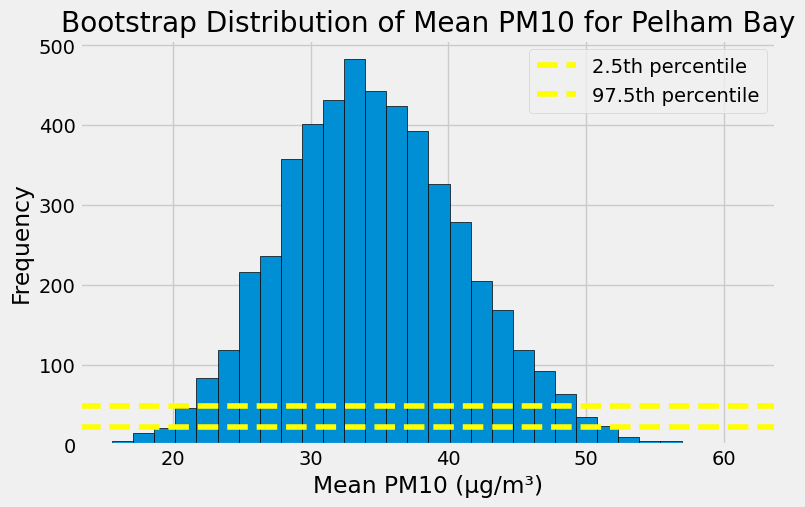

95% Confidence Interval for Pelham Bay: [ 22.40677679  48.07827679]


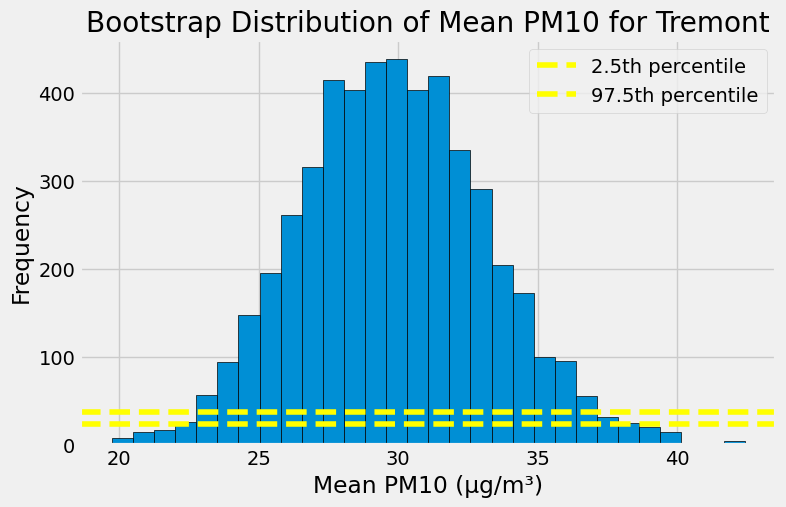

95% Confidence Interval for Tremont: [ 23.53156633  36.71295281]


In [34]:
# 1. Calculate mean pm10 for each neighborhood
neighborhood_means = joined_table.group('neighborhood', np.mean).sort('pm10 mean', descending=True)

# 2. Get top 3 neighborhoods
top_3_neighborhoods = neighborhood_means.take(np.arange(3)).column('neighborhood')

# 3. Bootstrap function
def bootstrap_mean(data, num_repetitions):
  means = []
  for _ in range(num_repetitions):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    mean = np.mean(bootstrap_sample)
    means.append(mean)
  return np.array(means)

# 4. Loop through top 3 neighborhoods, bootstrap, and plot
for neighborhood in top_3_neighborhoods:
  # Filter data for the current neighborhood
  neighborhood_data = joined_table.where('neighborhood', are.equal_to(neighborhood)).column('pm10')

  # Generate bootstrap samples
  bootstrapped_means = bootstrap_mean(neighborhood_data, num_repetitions=5000)

  # Calculate confidence interval
  confidence_interval = np.percentile(bootstrapped_means, [2.5, 97.5])

  # Create histogram
  plt.figure(figsize=(8, 5))
  plt.hist(bootstrapped_means, bins=30, edgecolor='black')
  plt.title(f'Bootstrap Distribution of Mean PM10 for {neighborhood}')
  plt.xlabel('Mean PM10 (µg/m³)')
  plt.ylabel('Frequency')

  # Overlay confidence interval
  plt.axhline(confidence_interval[0], color='yellow', linestyle='--', label='2.5th percentile')
  plt.axhline(confidence_interval[1], color='yellow', linestyle='--', label='97.5th percentile')
  plt.legend()

  plt.show()

  print(f"95% Confidence Interval for {neighborhood}: {confidence_interval}")

# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 10, 11, and 13, for guidance on Sampling and Empirical Distributions, Testing Hypotheses,  and Estimation.
- Test your code frequently to ensure it runs without errors.